<a href="https://colab.research.google.com/github/ajaythakur3369/InternCareer-Internship/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Breast Cancer Prediction**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - InternCareer**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/InternCareer-Internship)**

# **Problem Statement -**

Develop a predictive model to classify whether a breast mass is malignant or benign.

# **Let's Begin !**

In [ ]:
# Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Load the Data**

In [ ]:
# Access the drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/InternCareer/File_Name/Breast_cancer_dataset.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
# Checking the shape of the data
df.shape

(569, 33)

There are 569 rows and 33 columns present in the dataset

In [ ]:
# Checking the statistical description of the Data
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

In [ ]:
# What unique categories are present in the 'diagnosis' column?
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

There are 2 categories. 'M' stands for malignant and 'B' stands for benign

In [ ]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

**Clean and Prepare the Data**

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [ ]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Now, the diagnosis column is categorical, so we need to encode it to transform it into a numerical one. We will use label encoding here.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['diagnosis'])
df['diagnosis'] = le.transform(df['diagnosis'])

In [ ]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
# Checking the total number of null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

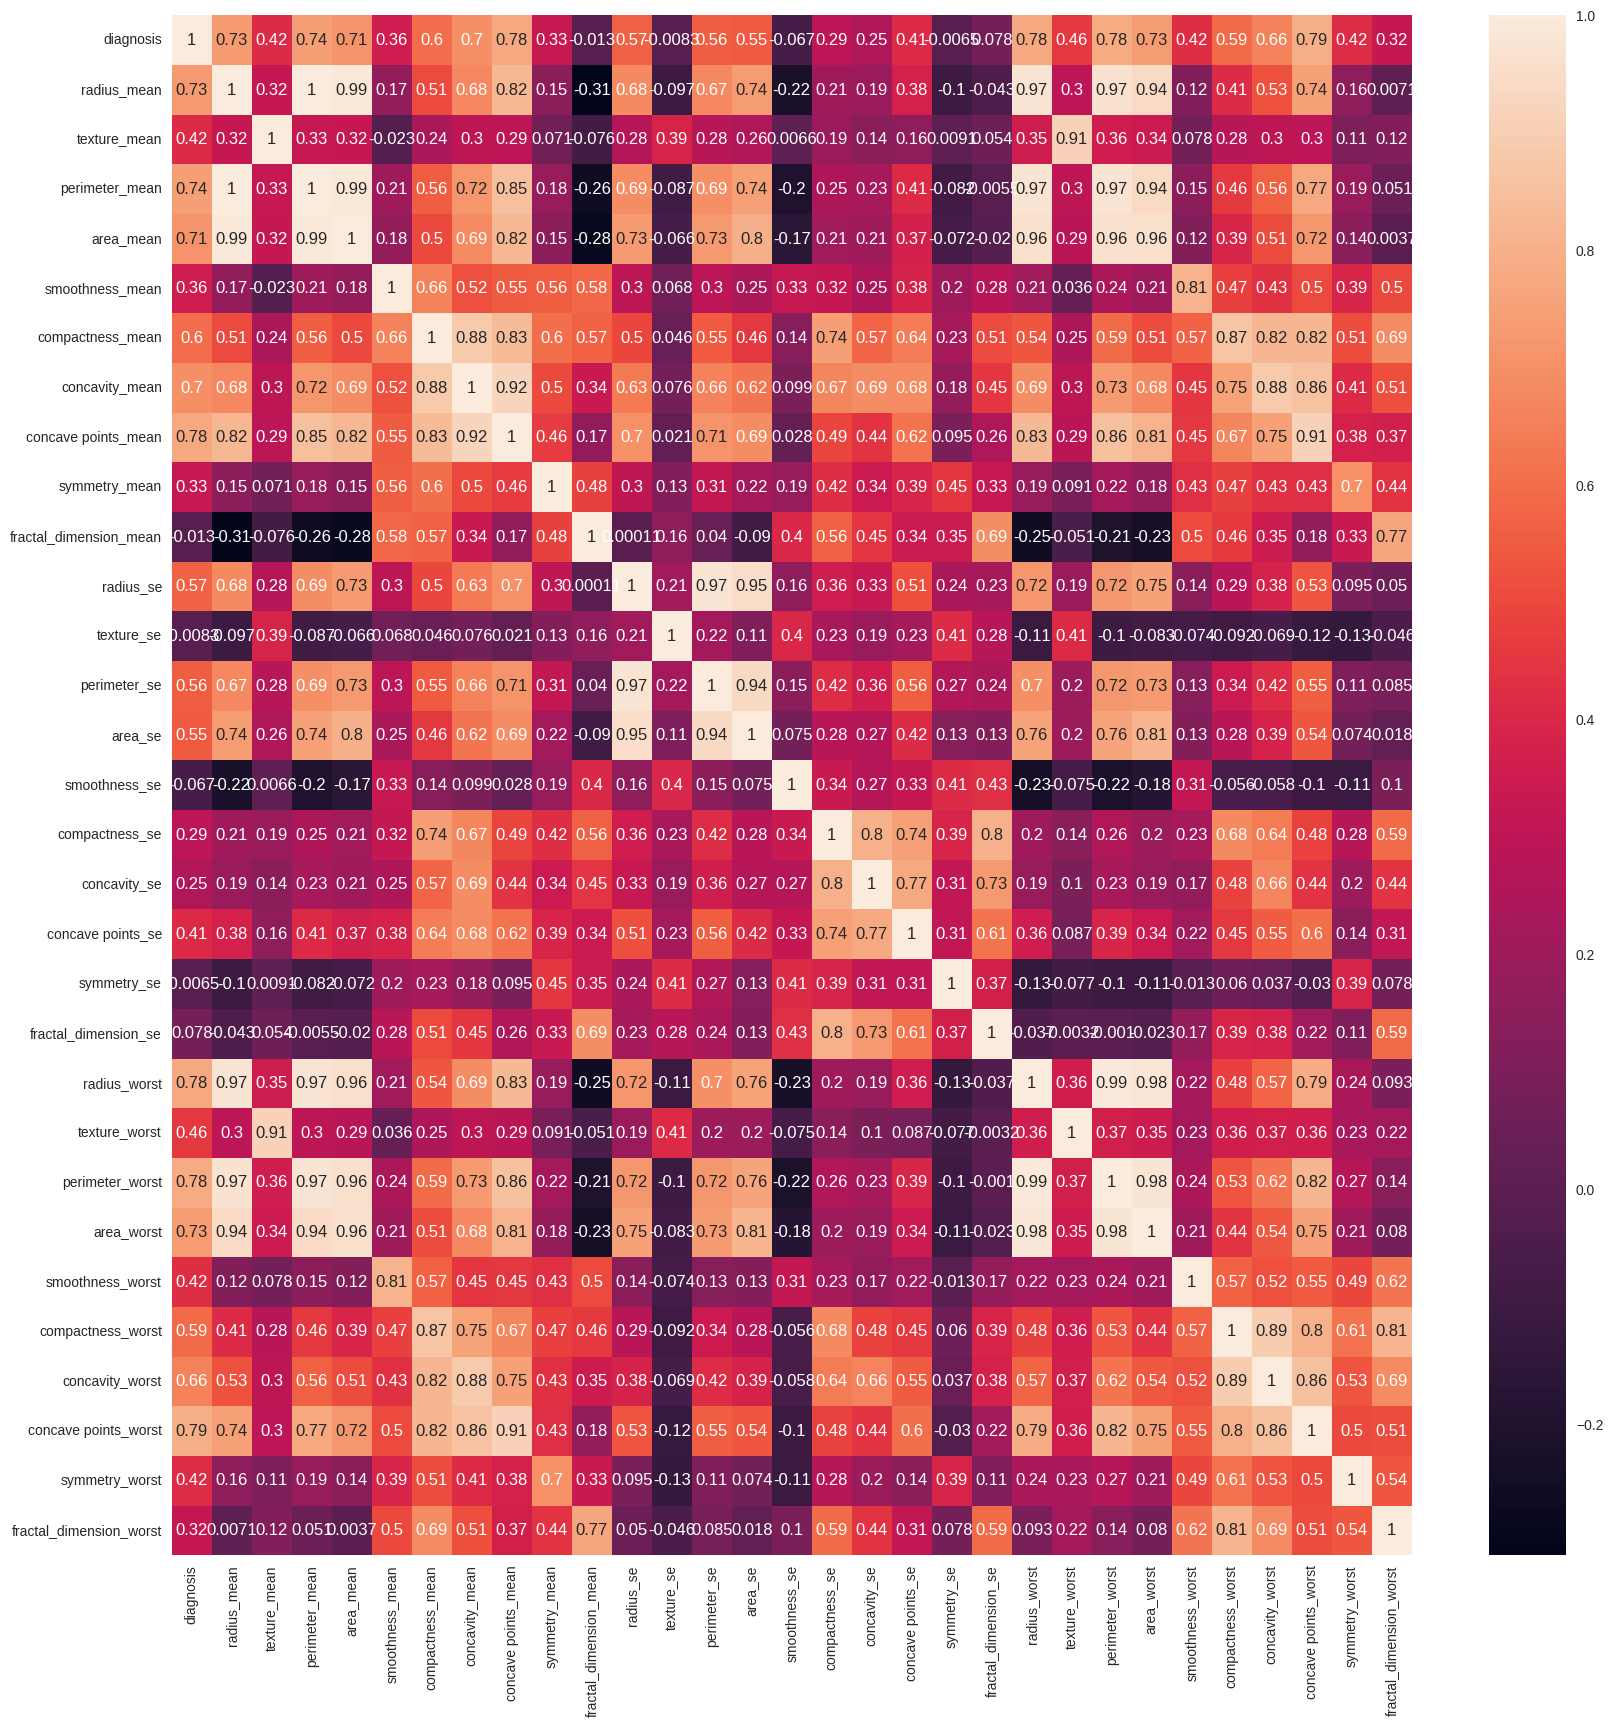

In [ ]:
# Checking the correlation matrix
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

radius_mean, perimeter_mean, and area_mean are highly correlated for malignant tumors

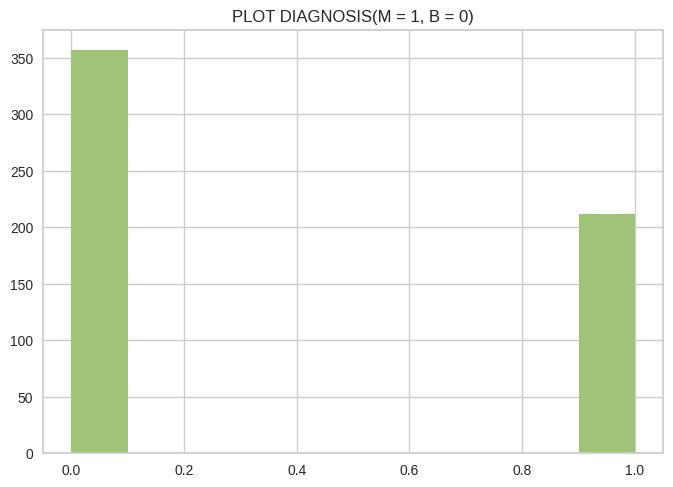

In [ ]:
plt.hist(df['diagnosis'], color = 'g')
plt.title('PLOT DIAGNOSIS(M = 1, B = 0)')
plt.show()

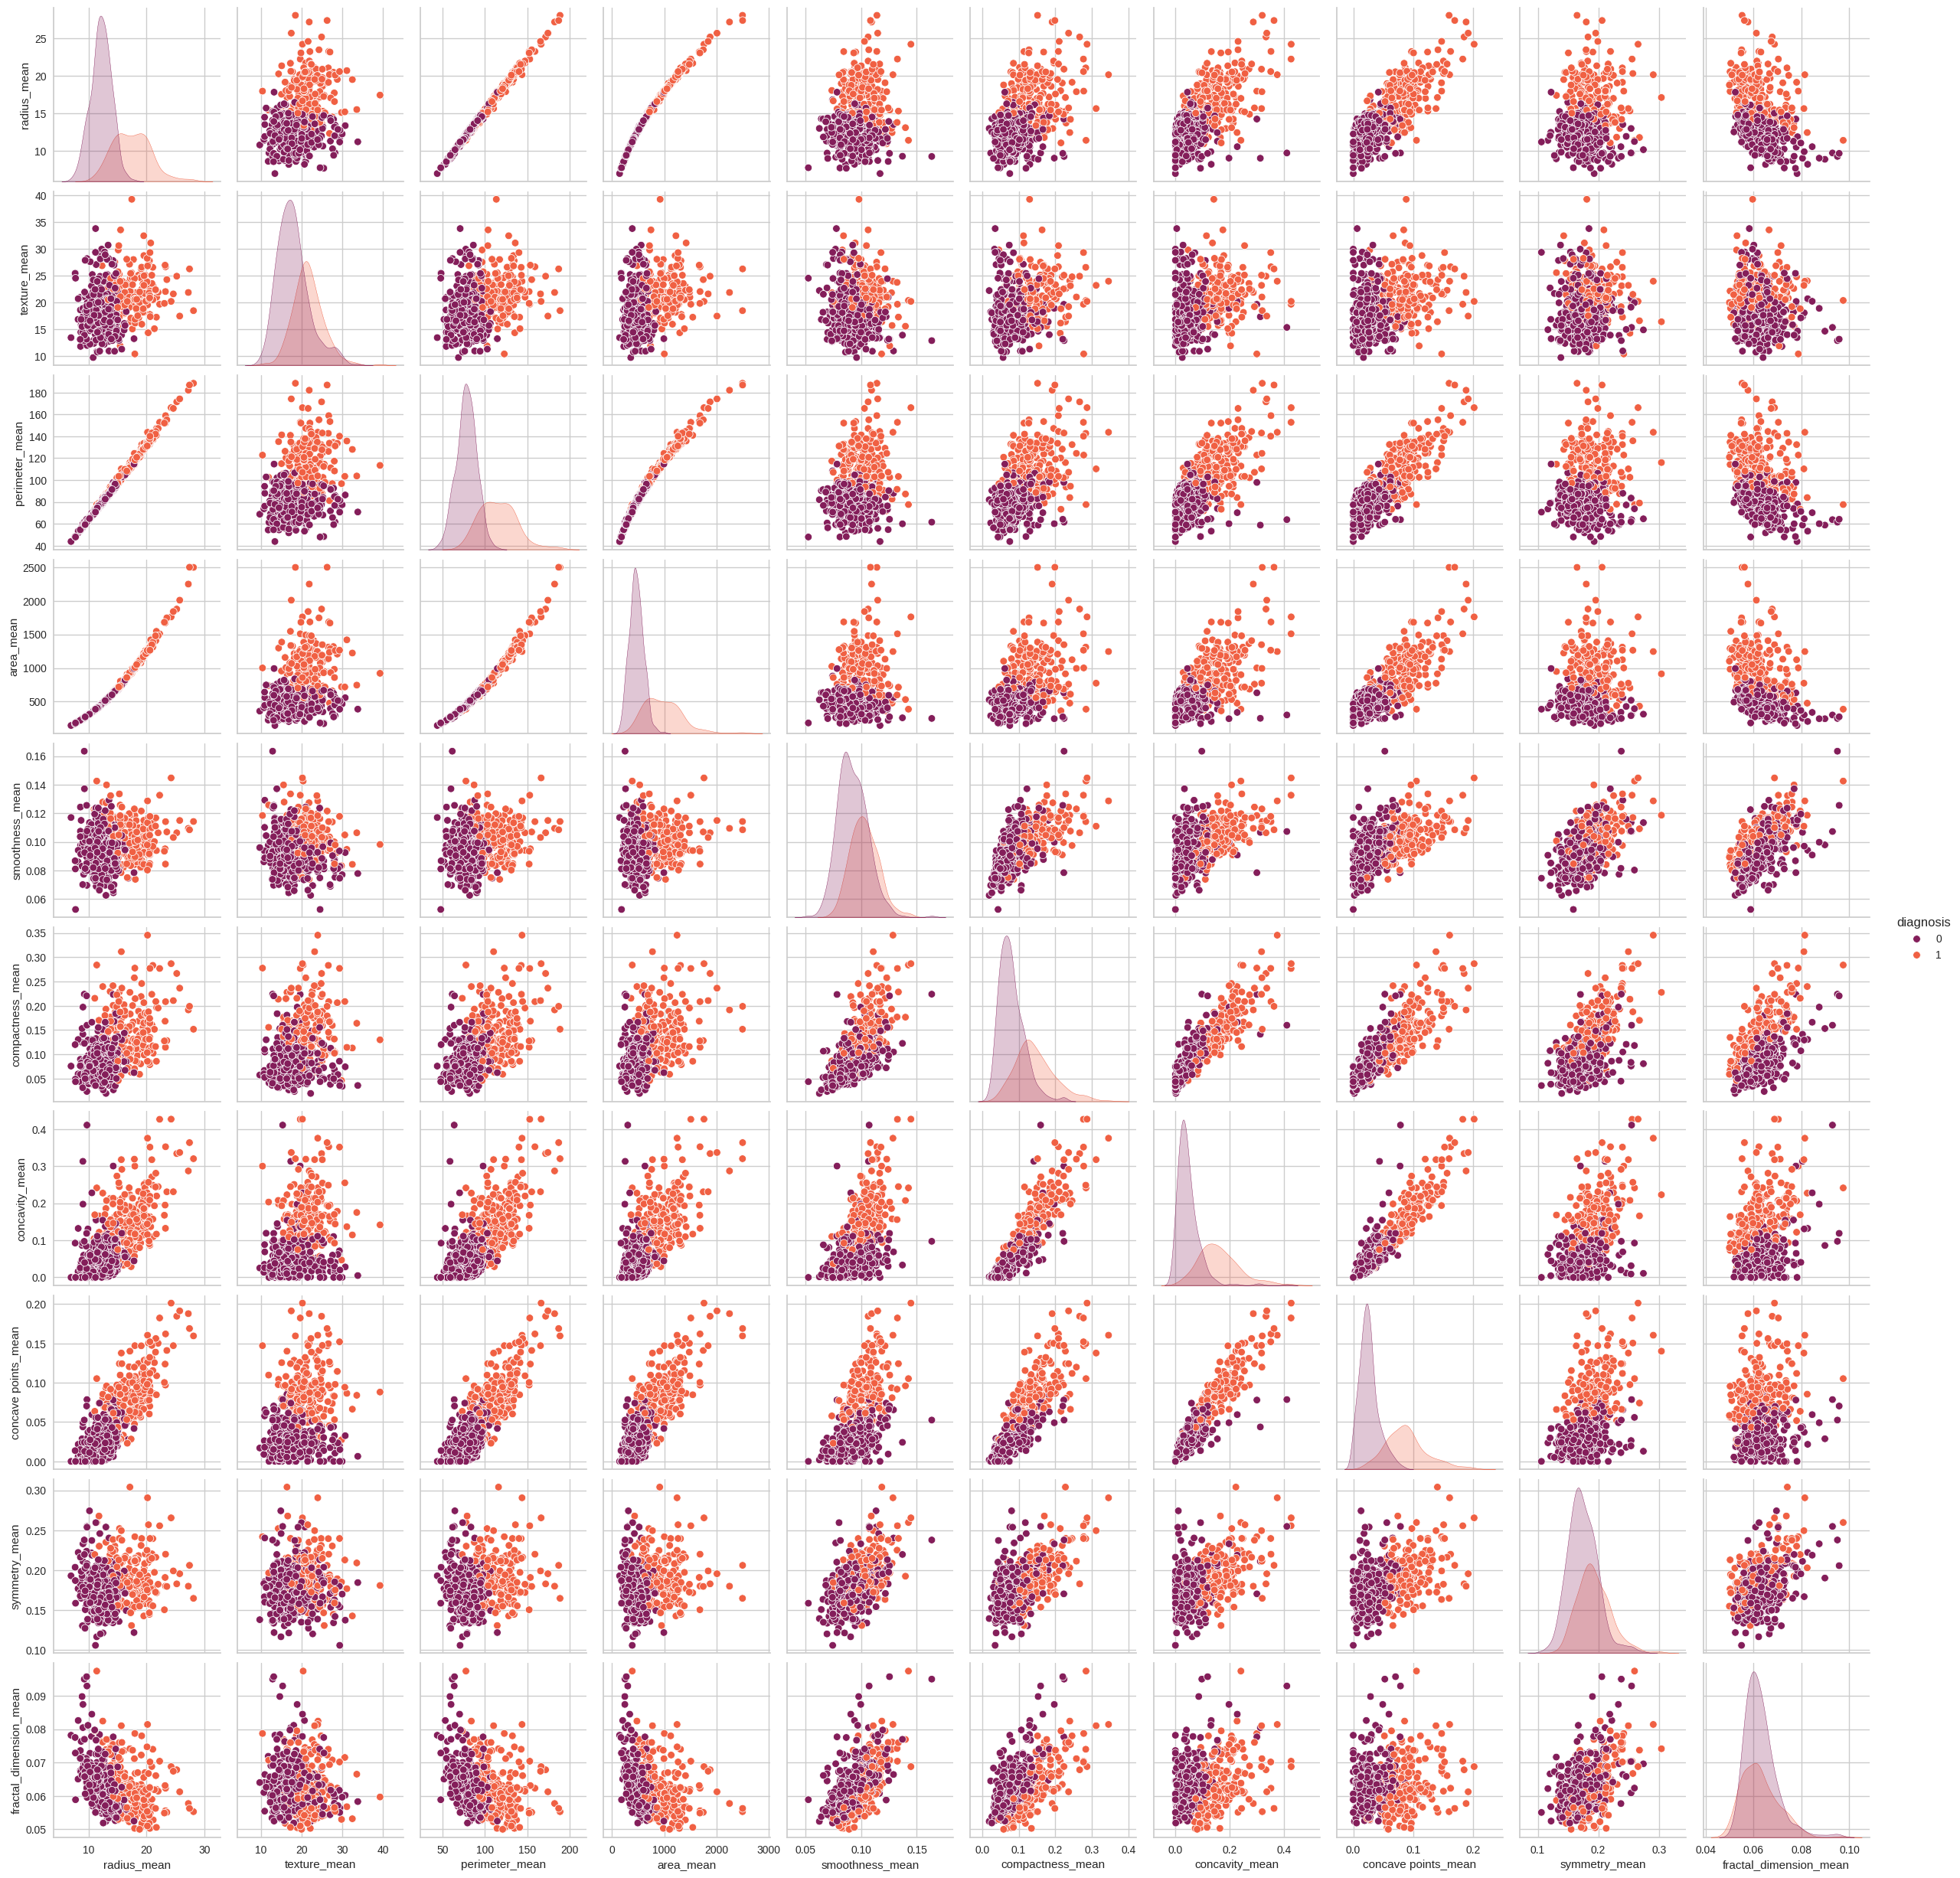

In [ ]:
# Generating a scatter plot matrix with the 'mean' column
cols=['diagnosis','radius_mean',
      'texture_mean','perimeter_mean',
      'area_mean','smoothness_mean',
      'compactness_mean','concavity_mean',
      'concave points_mean','symmetry_mean',
      'fractal_dimension_mean']
sns.pairplot(data = df[cols], hue = 'diagnosis', palette = 'rocket')

Almost perfectly linear patterns between the radius, perimeter, and area attributes suggest the presence of multicollinearity among these variables, as they are highly linearly related. Another set of variables that potentially indicate multicollinearity are the concavity, concave_points, and compactness.

Multicollinearity poses a problem as it undermines the significance of independent variables. We address it by removing the highly correlated predictors from the model. This can be done using techniques such as partial least squares regression or principal component analysis, which reduce the number of predictors to a smaller set of uncorrelated components.

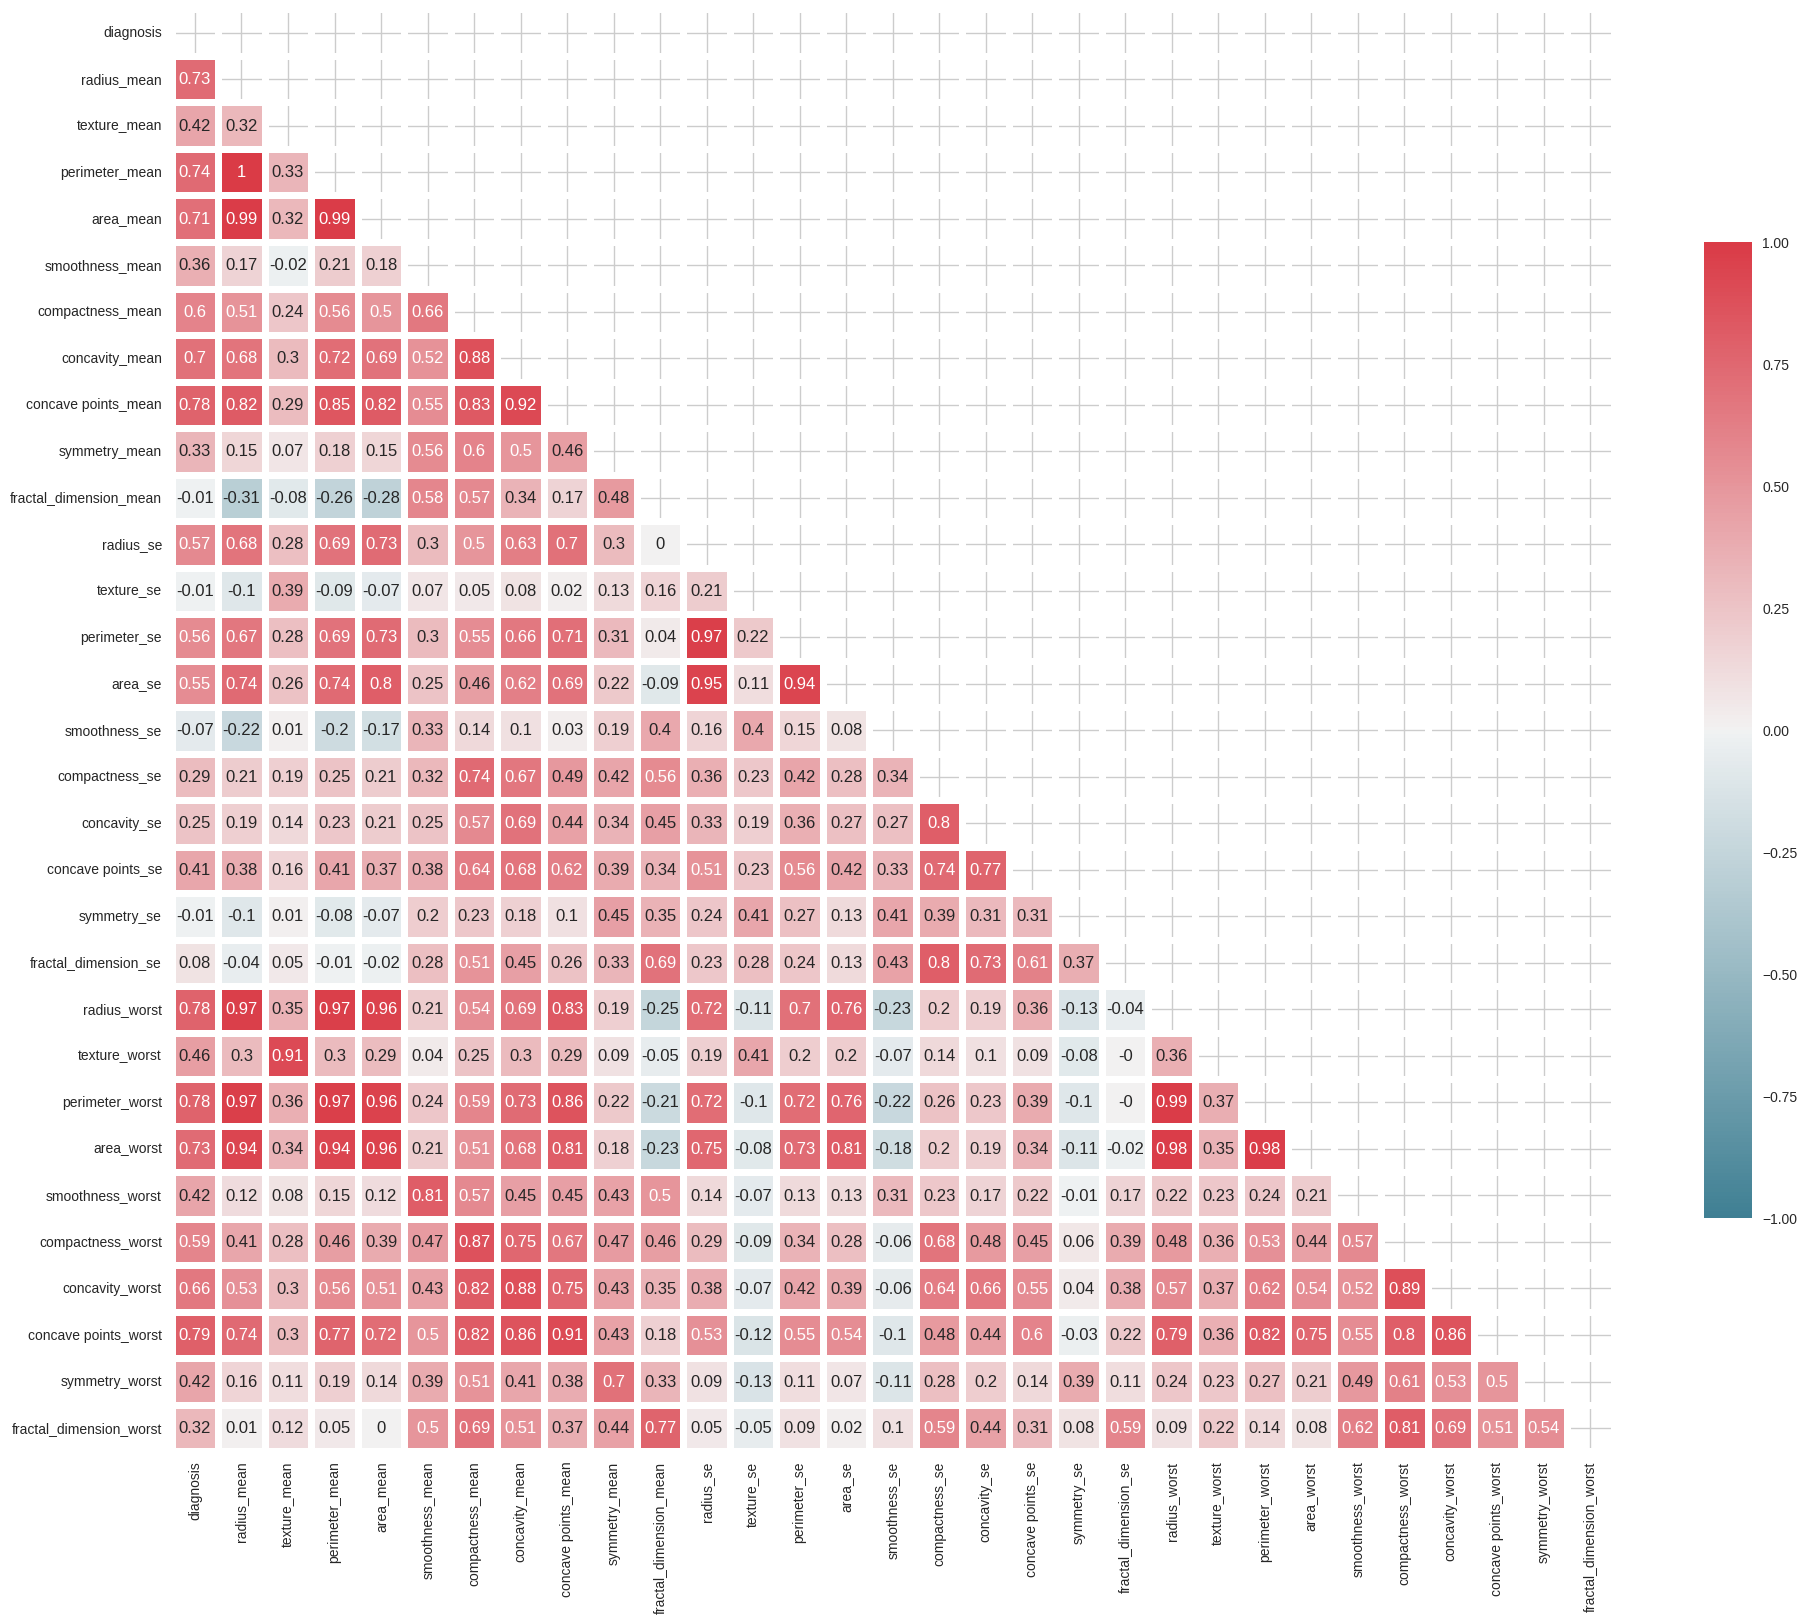

In [ ]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Create a mask for the upper triangle
# Use bool instead of np.bool
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set the Figure Size
f, ax = plt.subplots(figsize = (20, 20))

# Define a Custom Colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, center = 0,
            square = True, linewidths = 5, cbar_kws = {'shrink': 0.5}, annot = True)
plt.tight_layout()

We can verify the presence of multicollinearity between some of the variables. For instance, the 'radius_mean' column has correlations of 1 and 0.99 with the 'perimeter_mean' and 'area_mean' columns, respectively. This is because the three columns essentially contain the same information, which is the physical size of the observations. Therefore, we should only pick one of the three columns for further analysis, and we choose 'radius.'

Another instance of multicollinearity is apparent between the 'mean' columns and the 'worst' columns. For example, the 'radius_mean' column has a correlation of 0.97 with the 'radius_worst' column.

Additionally, there is multicollinearity between the attributes 'compactness,' 'concavity,' and 'concave points.' Therefore, we can choose just one out of these, and I am opting for 'compactness.

In [ ]:
# First, drop all 'worst' columns
cols = ['radius_worst', 'texture_worst', 'perimeter_worst',
      'area_worst','smoothness_worst', 'compactness_worst',
      'concavity_worst', 'concave points_worst',
      'symmetry_worst', 'fractal_dimension_worst']
df = df.drop(cols, axis = 1)

In [ ]:
# Drop all columns related to the perimeter and area attributes
cols = ['perimeter_mean', 'perimeter_se',
      'area_mean', 'area_se']
df = df.drop(cols, axis = 1)

In [ ]:
# Lastly, drop all columns related to the 'concavity' and 'concave points' attributes
cols = ['concavity_mean', 'concavity_se',
      'concave points_mean', 'concave points_se']
df = df.drop(cols, axis = 1)

In [ ]:
# Verify the remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

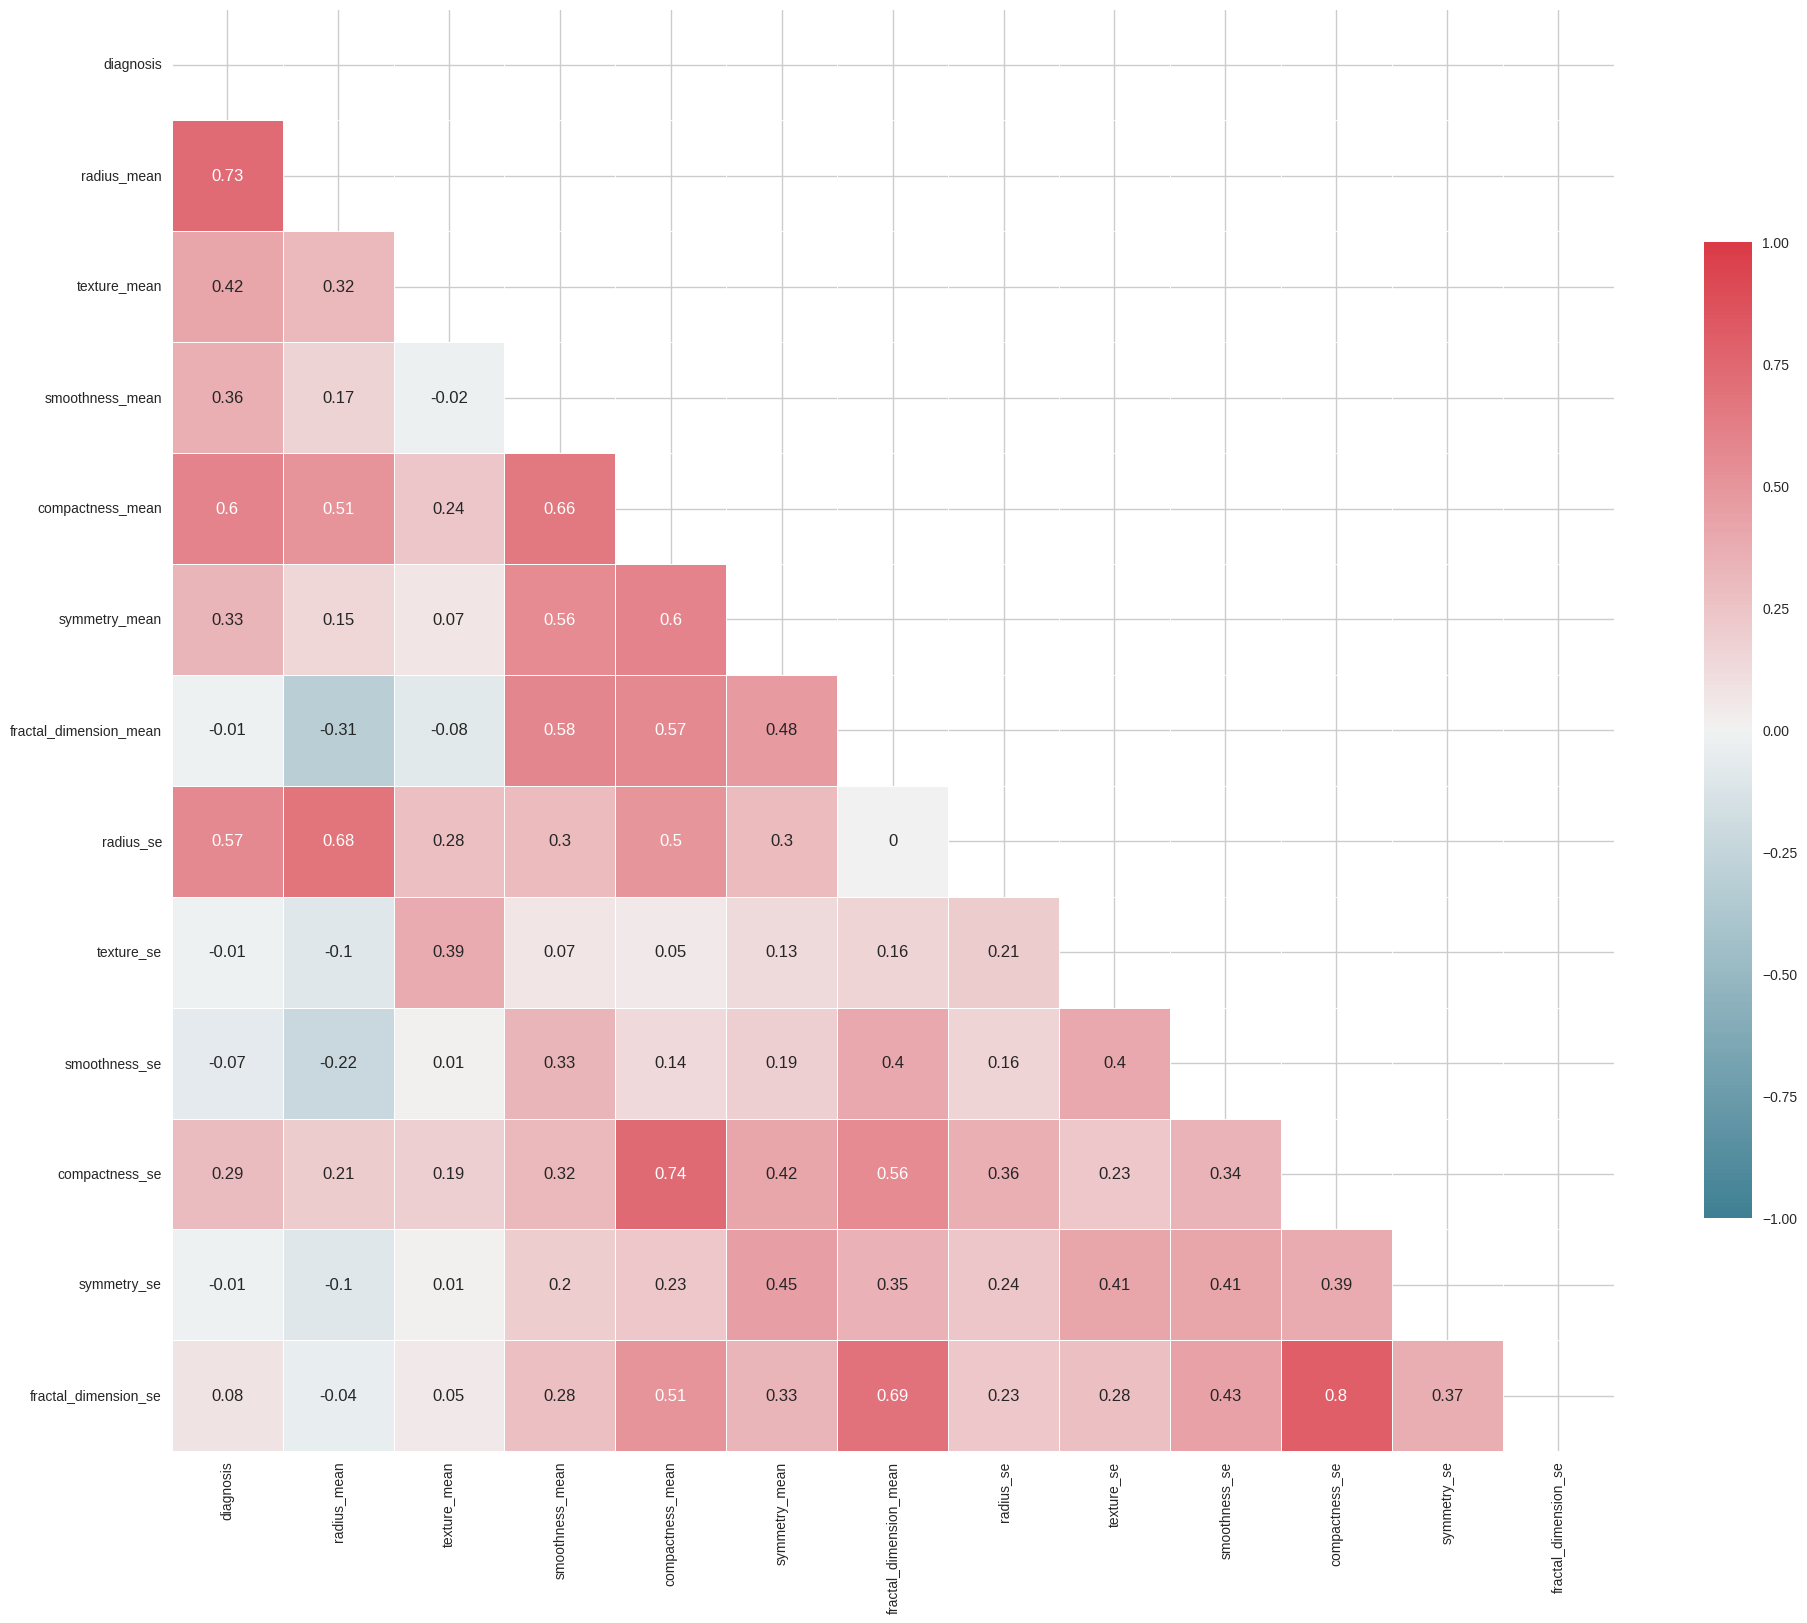

In [ ]:
# Draw the heatmap again, using the new correlation matrix
corr = df.corr().round(2)

# Use bool instead of np.bool
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0, square = True, linewidths = 0.5, cbar_kws = {'shrink': 0.5}, annot = True)
plt.tight_layout()

**Model Selection**

In [ ]:
import pandas as pd
import pycaret
from pycaret.classification import*

# Load your dataset into the variable df
# Replace 'Breast_cancer_dataset.csv' with your dataset file path
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/InternCareer/File_Name/Breast_cancer_dataset.csv")
# Perform setup with pycaret
s = setup(df, target = 'diagnosis')

In [ ]:
!pip install pycaret
import pycaret
from pycaret.classification import*
s = setup(df, target = 'diagnosis')

In [ ]:
best = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Here, we don't solely rely on the accuracy of the model. Instead, we prioritize the model with the highest precision, as precision represents the proportion of true positives.

In this specific case, where we are predicting whether a breast cancer is malignant or not, it is crucial to prioritize precision to avoid misclassifying benign cases as malignant.

Therefore, although XStream Gradient Boosting provides the highest accuracy, we choose the Ridge Classifier as our model because it offers a precision of 95.94% and an accuracy of 91.4%.

**Model Building**

In [ ]:
x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 18)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [ ]:
# Create and train a Ridge Classifier with multiple specified parameters
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report

# Regularization strength
alpha = 1

# Maximum number of iterations for the solver to converge
max_iter = 1000

# Solver for optimization ('auto' means automatically)
solver = 'auto'

# Tolerance for stopping criterion
tol = 1e-3

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeClassifier

# Instantiate the imputer
# You can use 'median' or 'most_frequent' as well
imputer = SimpleImputer(strategy = 'mean')

# Fit and transform the training data
x_train_imputed = imputer.fit_transform(x_train)

# Transform the test data
x_test_imputed = imputer.transform(x_test)

# Instantiate and train the RidgeClassifier
ridge_classifier = RidgeClassifier(alpha = alpha, max_iter = max_iter, solver = solver, tol = tol)
ridge_classifier.fit(x_train_imputed, y_train)


RidgeClassifier(alpha=1, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=1000, positive=False, random_state=None, solver='auto',
                tol=0.001)

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well

# Fit the imputer to the training data
imputer.fit(x_train)

# Transform the training data
x_train_imputed = imputer.transform(x_train)

# Transform the test data
x_test_imputed = imputer.transform(x_test)

# Make predictions using the trained RidgeClassifier
y_pred = ridge_classifier.predict(x_test_imputed)

In [ ]:
# Calculate the accuracy score to evaluate the model
accuracy = (accuracy_score(y_test, y_pred)*100)
print('ACCURACY:', round(accuracy, 2), '%')

ACCURACY: 94.74 %


In [ ]:
# Generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96        66
           M       1.00      0.88      0.93        48

    accuracy                           0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

